# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Anandi Neina Aeyska Mahdi
- **Email:** anandineina@gmail.com
- **ID Dicoding:** anandineina

## Menentukan Pertanyaan Bisnis

- Pada musim apa pengguna registered paling banyak menyewa?
- Bagaimana tren penyewaan sepeda pada tahun 2011 dan 2012?
- Apa pengaruh cuaca terhadap penyewaan sepeda?
- Berapa rata-rata jumlah sepeda yang disewa pengguna casual setiap jamnya?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

## Data Wrangling

Data wrangling adalah tahap pertama dalam analisis data yang meliputi pengumpulan data (gathering), penilaian data (assessing), dan pembersihan data (cleaning).

### Gathering Data

gathering data merupakan proses mengumpulkan semua data yang dibutuhkan

In [2]:
df_day = pd.read_csv("data/day.csv")
df_hour = pd.read_csv("data/hour.csv")

memuat data dari file day dan hour

In [3]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


memuat data dari day menjadi DataFrame yang secara default menampilkan 5 baris pertama

In [4]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


memuat data dari hour menjadi DataFrame yang secara default menampilkan 5 baris pertama

### Assessing Data

assessing data merupakan proses menilai kualitas data, pada proses ini akan diperiksa apakah terdapat tipe data yang tidak sesuai, missing value atau jumlah data kurang, dan ada atau tidaknya duplikasi data

#### Day Data Frame

In [5]:
df_day.info()
print("Jumlah duplikasi: ", df_day.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah duplikasi:  0


In [6]:
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- Data type : data type pada column "dteday" seharusnya datetime bukan object 
- Missing value : tidak terdapat missing value
- Duplicated : tidak terdapat data yang terduplikasi

#### Hour Data Frame

In [7]:
df_hour.info()
print("Jumlah duplikasi: ", df_hour.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
Jumlah duplikasi:  0


In [8]:
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- Data type : data type pada column "dteday" seharusnya datetime bukan object 
- Missing value : tidak terdapat missing value
- Duplicated : tidak terdapat data yang terduplikasi

### Cleaning Data

cleaning data dalah proses terakhir dalam data wrangling yaitu untuk membersihkan masalah yang ditemui pada saat proses assessing data.

pada assessing data, terdapat tipe data yang tidak sesuai yaitu pada kolom dteday di mana seharusnya tipe datanya adalah datetime

In [9]:
df_day["dteday"] = pd.to_datetime(df_day["dteday"])
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])

In [10]:
data_type_dteday_day = df_day["dteday"].dtype
print("Tipe data dteday pada df day : ", data_type_dteday_day)

data_type_dteday_hour = df_hour["dteday"].dtype
print("Tipe data dteday pada df hour : ", data_type_dteday_hour)

Tipe data dteday pada df day :  datetime64[ns]
Tipe data dteday pada df hour :  datetime64[ns]


tipe data pada kedua data frame kini sudah benar yaitu datetime

## Exploratory Data Analysis (EDA)

Tahap selanjutnya dalam analisis data adalah Exploratory Data Analysis (EDA), di mana proses ini bertujuan untuk mendapatkan insight

In [11]:
df_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


menampilkan parameter statistik dari df_day yang berisi beberapa informasi seperti tanggal, musim, tahun, bulan, jam, dan lainnya yang berhubungan dengan data penyewaan sepeda

In [12]:
df_day.groupby(by="season").agg({
    "registered" :["sum"]
})

,registered
,sum
season,
1,410726
2,715067
3,835038
4,711831


menghasilkan pivot table penyewaan sepeda oleh pengguna registered berdasarkan musim. musim diwakili dengan angka 1-4 yaitu musim semi, panas, gugur, dan dingin.

In [13]:
df_day.groupby(by="yr").agg({
    "cnt" :["sum"]
})

,cnt
,sum
yr,
0,1243103
1,2049576


menghasilkan pivot table penyewaan sepeda berdasarkan tahun. tahun diwakili dengan angka 0 dan 1 yaitu tahun 2011 dan 2012.

In [14]:
df_day.groupby(by="weathersit").agg({
    "cnt": ["max", "mean", "sum"]
}).round()

cnt                 
             max    mean      sum
weathersit                       
1           8714  4877.0  2257952
2           8362  4036.0   996858
3           4639  1803.0    37869

menghasilkan pivot table penyewaan sepeda berdasarkan cuaca.
- 1 = clear, few clouds, partly cloudy, partly cloudy
- 2 = mist + cloudy, mist + broken clouds, mist + few clouds, mist
- 3 = light snow, light rain + thunderstorm + scattered clouds, light rain + scattered clouds

In [15]:
df_hour.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


menampilkan parameter statistik dari df_hour. perbedaan df_day dan df_hour adalah pada df_hour terdapat kolom hr yang mewakili jam (0-23)

In [16]:
df_hour.groupby(by="hr").agg({
    "casual" :["mean"]
}).round()

,casual
,mean
hr,
0,10.0
1,7.0
2,5.0
3,3.0
4,1.0
5,1.0
6,4.0
7,11.0


menghasilkan pivot table rata-rata penyewaan sepeda pengguna casual setiap jamnya kemudian hasil rata-rata tersebut dibulatkan menggunakan method round()

## Visualization & Explanatory Analysis

### Pertanyaan 1 : Pada musim apa pengguna registered paling banyak menyewa?


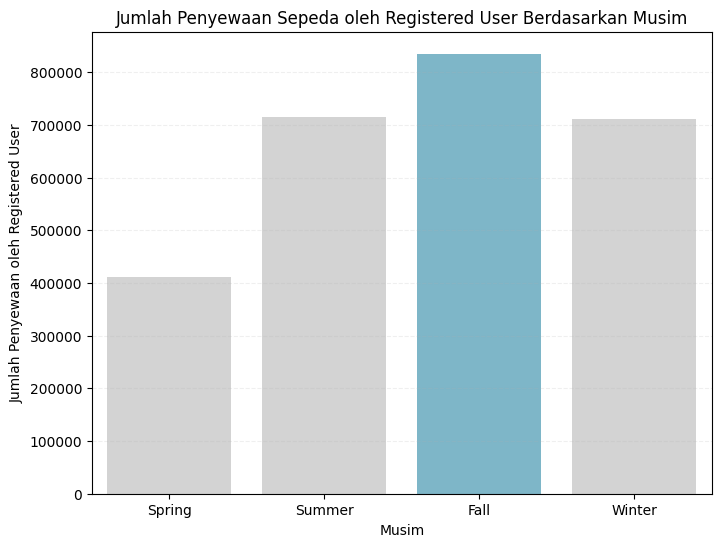

In [17]:
registered_user_rent = df_day.groupby("season")["registered"].sum().reset_index()

season_mapping = {
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter"
}

registered_user_rent["season"] = registered_user_rent["season"].map(season_mapping)

plt.figure(figsize=(8, 6))
colors = ["#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3"]

sns.barplot(
    x="season",
    y="registered",
    data=registered_user_rent,
    hue="season",
    palette=colors,
    legend=False
)
plt.title("Jumlah Penyewaan Sepeda oleh Registered User Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan oleh Registered User")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.2)
plt.show()


### Pertanyaan 2 : Bagaimana tren penyewaan sepeda pada tahun 2011 dan 2012?


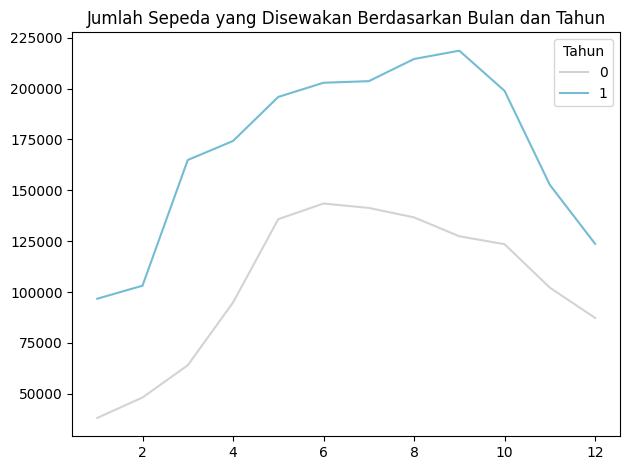

In [18]:
df_day["month"] = pd.Categorical(df_day["mnth"], categories= ["1","2","3","4","5","6","7","8","9","10","11","12"], ordered=True)

trends = df_day.groupby(by=["mnth","yr"]).agg({
    "cnt": "sum"
}).reset_index()

colors = {0: "#D3D3D3", 1:"#72BCD4"}

sns.lineplot(
    data=trends,
    x="mnth",
    y="cnt",
    hue="yr",
    palette=colors,
)

plt.title("Jumlah Sepeda yang Disewakan Berdasarkan Bulan dan Tahun")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun")
plt.tight_layout()
plt.show()

### Pertanyaan 3 : Apa pengaruh cuaca terhadap penyewaan sepeda?

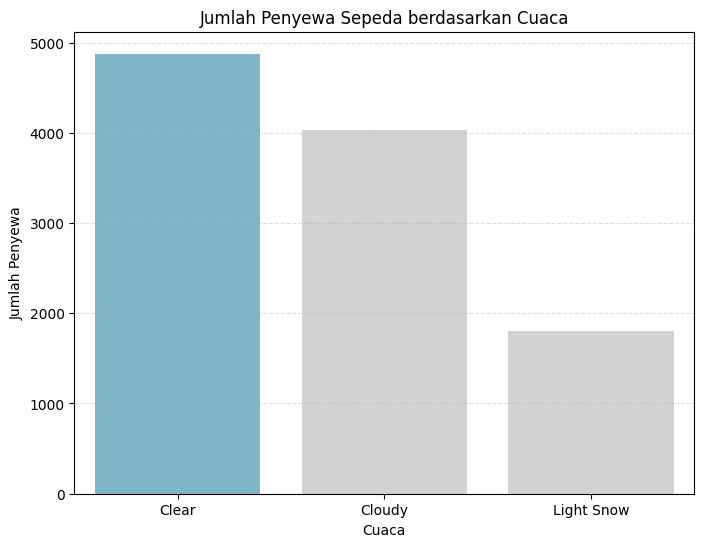

In [19]:
plt.figure(figsize=(8, 6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="weathersit",  
    y="cnt", 
    data=df_day,
    hue="weathersit",
    palette=colors,
    legend=False,
    errorbar=None
)
plt.title("Jumlah Penyewa Sepeda berdasarkan Cuaca")
plt.xlabel("Cuaca")
plt.ylabel("Jumlah Penyewa")
plt.xticks(ticks=[0, 1, 2], labels=["Clear", "Cloudy", "Light Snow"])
plt.grid(axis="y", linestyle="--", alpha=0.4) 
plt.show()

### Pertanyaan 4 : Berapa rata-rata jumlah sepeda yang disewa pengguna casual setiap jamnya?

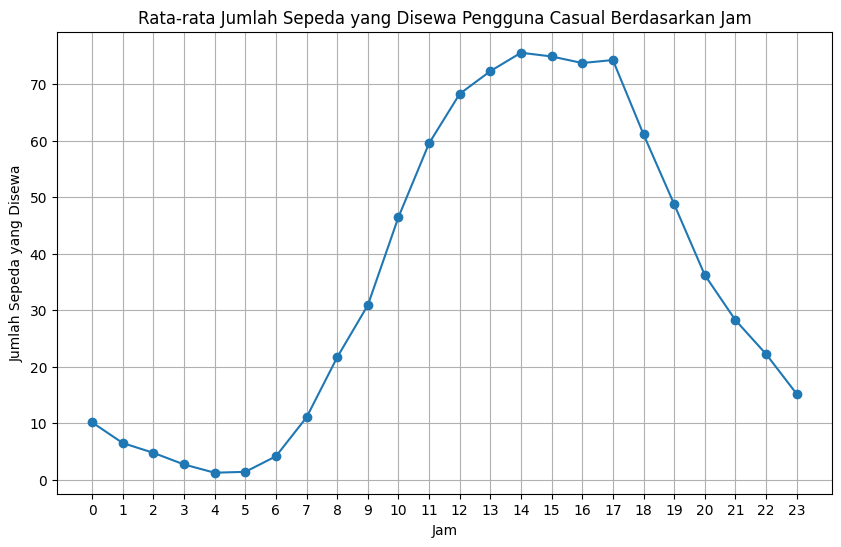

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(df_hour.groupby("hr")["casual"].mean(), marker="o", linestyle="-")
plt.title("Rata-rata Jumlah Sepeda yang Disewa Pengguna Casual Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Sepeda yang Disewa")
plt.grid(True)
plt.xticks(df_hour["hr"].unique()) 
plt.show()

## Conclusion

### Pada musim apa pengguna registered paling banyak menyewa?
Berdasarkan hasil visualisasi di atas, pengguna registered paling banyak menyewa pada musim gugur (fall). Sedangkan, penyewa registered paling sedikit yaitu pada musim semi (spring).

### Bagaimana tren penyewaan sepeda pada tahun 2011 dan 2012?
Pada tahun 2012 terdapat peningkatan jumlah penyewaan sepeda dibandingkan tahun 2011. Penyewaan sepeda cenderung lebih sedikit pada awal tahun kemudian terdapat peningkatan. Puncak penyewaan paling tinggi pada tahun 2011 terjadi di bulan Juni, sedangkan pada tahun 2012 di bulan September. Akhir tahun penyewaan kembali menurun, hal ini terjadi pada tahun 2011 maupun 2012.

### Apa pengaruh cuaca terhadap penyewaan sepeda?
Penyewaan sepeda paling banyak dilakukan ketika langit sedang cerah dan tidak terdapat banyak awan. Sebaliknya, penyewaan paling sedikit ketika terdapat salju/hujan ringan/badai petir

### Berapa rata-rata jumlah sepeda yang disewa pengguna casual setiap jamnya?
Dapat dilihat pada hasil visualisasi tersebut, terjadi peningkatan rata-rata jumlah sepeda yang disewa pengguna casual dari jam 7 hingga jam 14 yang merupakan puncaknya. Setelah jam 14, rata-rata penyewaan sepeda menurun.

In [21]:
df_day.to_csv("day_cleaned.csv", index=False)

In [22]:
df_hour.to_csv("hour_cleaned.csv", index=False)

cleaned data diexport ke csv